# Importowanie bibliotek

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from hax.utils.statistics import Statistics
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## Pobranie danych

In [16]:
path = "statistics\\FINAL_REDALDO_VS_RANDOM_BLUESSI"
experiences, actorLosses, criticLosses = Statistics.load(path)

print(len(experiences))
print(len(criticLosses))
print(len(actorLosses))


1683860
18747
18747


# Wykresy

168386.0


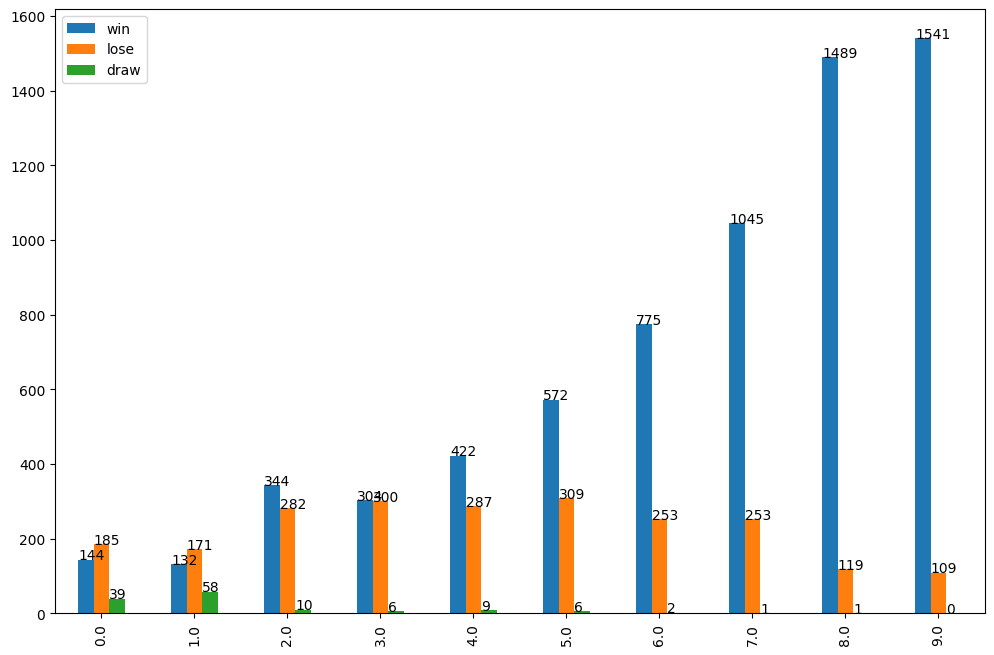

In [17]:
groups = 10
groupSize = experiences.shape[0] / groups
print(groupSize)
groupedMemories = experiences.groupby(experiences.index // groupSize).sum()
mems = groupedMemories[["win", "lose", "draw"]].plot.bar()
for p in mems.patches:
    mems.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.05))

# 852 / 199 / 1
# 918 / 185 / 0
# 1088 / 164 / 0
# 1387 / 115 / 1
# 1520 / 111 / 0
# 1541 / 109 / 0


<AxesSubplot:>

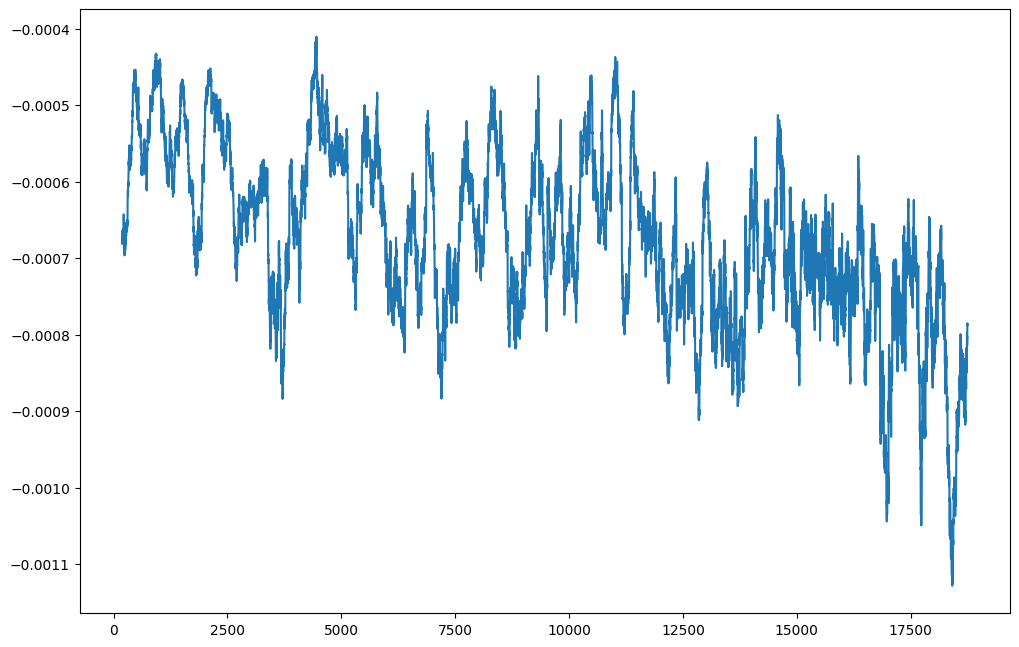

In [18]:
data = actorLosses["loss"]

data.rolling(window=len(data)//100).mean().plot(y="loss")


<AxesSubplot:>

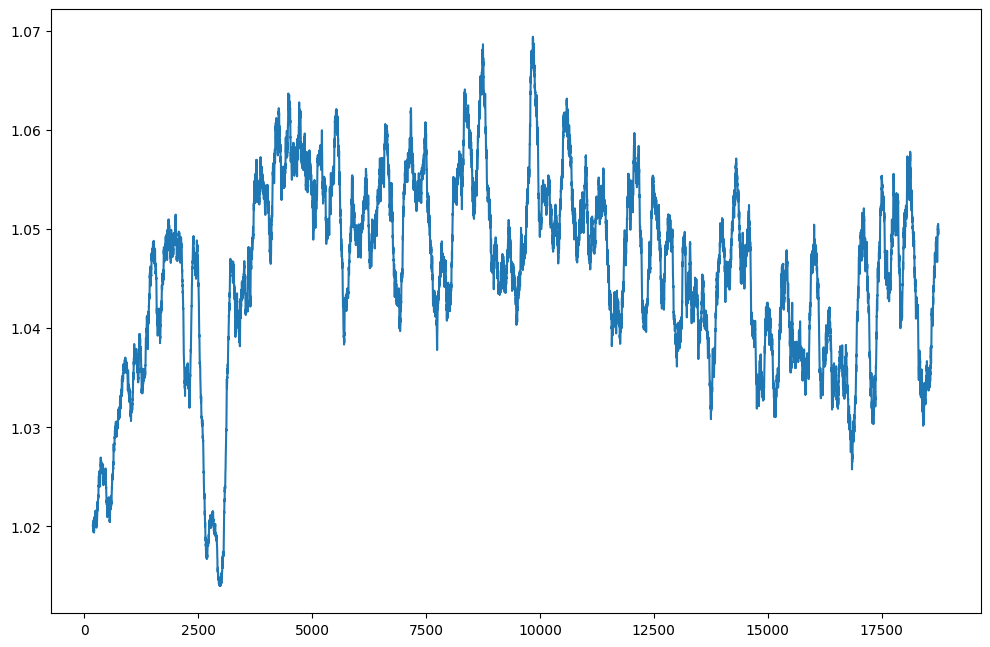

In [19]:
data = criticLosses["loss"]

data.rolling(window=len(data)//100).mean().plot(y="loss")


<AxesSubplot:>

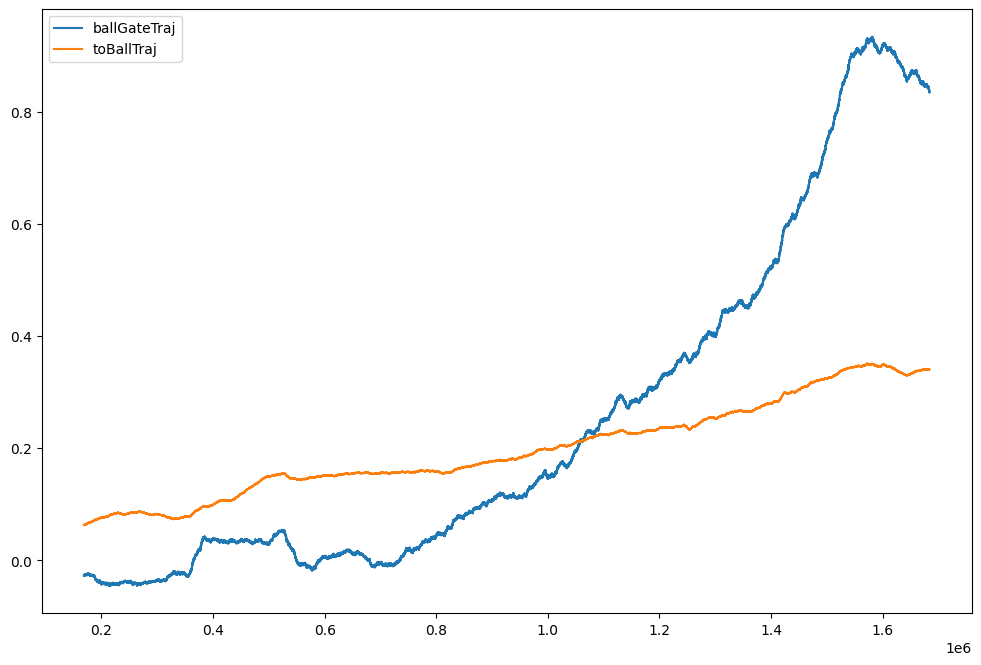

In [20]:
data = experiences[["ballGateTraj", "toBallTraj"]]
data = data.dropna()
roll = data.rolling(window=int(groupSize)).mean()
roll.plot()


<AxesSubplot:>

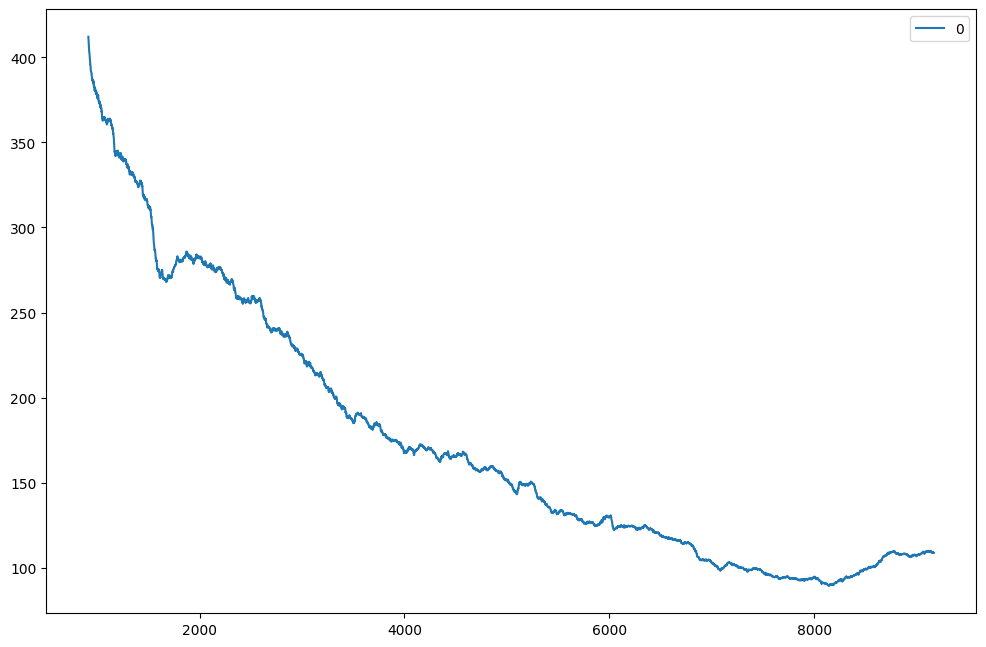

In [21]:
episodeLengths = []
currentEpisodeLength = 1
for row in experiences.itertuples():
    if row.done:
        episodeLengths.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengths.append(currentEpisodeLength)

episodeLengths = pd.DataFrame(episodeLengths)
roll = episodeLengths.rolling(window=len(episodeLengths)//10).mean()
roll.plot()